# Random Forest Regressor Model - APPL Stock Prediction

In [1]:
!pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 11.6 MB/s eta 0:00:00


In [3]:
#Importing Libraries
import numpy as np
import pandas as pd
import hvplot.pandas
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
from sklearn import metrics

In [4]:
# Read APPL.csv contains open, high, low, close, Adj close, Volume of Apple stock with twitter polarity scores and twitter volume
# The Date will be used as an index for the dataframe.

df = pd.read_csv('/content/AAPL (2).csv', infer_datetime_format=True, parse_dates=True)

# Drop null values
# Dropping out the in-consistent values: null rows
df.dropna(inplace=True)
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,ts_polarity,twitter_volume
917,2019-08-26,51.47,51.80,51.26,51.62,51.12,104174400,0.072340,888.0
918,2019-08-27,51.97,52.14,50.88,51.04,50.54,103493200,0.117541,962.0
919,2019-08-28,51.03,51.43,50.83,51.38,50.88,63755200,0.061477,895.0
920,2019-08-29,52.13,52.33,51.67,52.25,51.74,83962000,0.056460,1083.0
921,2019-08-30,52.54,52.61,51.80,52.19,51.67,84573600,0.106096,1005.0


In [5]:
# Dataframe with Adj close, ts_polarity, twitter_volume of APPL
df = df[["Adj Close", "ts_polarity", "twitter_volume"]]
df.head()

,Adj Close,ts_polarity,twitter_volume
0,24.44,0.070389,1133.0
1,23.83,0.133635,1430.0
2,23.36,0.072042,1949.0
3,22.38,0.074369,2289.0
4,22.50,0.051595,2235.0


In [6]:
# pct change based on Adj close value
# Adding a new column to the Dataframe. Column name: pct:change is the diff between closed prices
df["Pct_change"] = df["Adj Close"].pct_change()

# Drop null values
df.dropna(inplace = True)
df.head()


,Adj Close,ts_polarity,twitter_volume,Pct_change
1,23.83,0.133635,1430.0,-0.024959
2,23.36,0.072042,1949.0,-0.019723
3,22.38,0.074369,2289.0,-0.041952
4,22.50,0.051595,2235.0,0.005362
5,22.86,0.019443,1222.0,0.016000


In [7]:
# This function "window_data" accepts the column number for the features (X) and the target (y)
# It chunks the data up with a rolling window of Xt-n to predict Xt
# It returns a numpy array of X any y
def window_data(df, window, feature_col_number1, feature_col_number2, feature_col_number3, target_col_number):
    # Create empty lists "X_close", "X_polarity", "X_volume" and y
    X_close = []
    X_polarity = []
    X_volume = []
    y = []

    #loop is iterated over the rows of data-frame toensure we enough data for a complete window
    for i in range(len(df) - window):

        # Get close, ts_polarity, tw_vol, and target in the loop
        # Using iloc to slice each window
        # The values of the feature and target are collected from the window
        close = df.iloc[i:(i + window), feature_col_number1]
        ts_polarity = df.iloc[i:(i + window), feature_col_number2]
        tw_vol = df.iloc[i:(i + window), feature_col_number3]
        target = df.iloc[(i + window), target_col_number]

        # Append values in the lists
        X_close.append(close)
        X_polarity.append(ts_polarity)
        X_volume.append(tw_vol)
        y.append(target)

    # Returning lists
    # Horizontally stacking all 3 lists into a single array  in order to create the feature matrix X
    # The target 'y' is converted to a numpy array and then reshaping it for further processing
    return np.hstack((X_close,X_polarity,X_volume)), np.array(y).reshape(-1, 1)

In [8]:
# Predict Closing Prices using a 3 day window of previous closing prices
window_size = 5

# Column index 0 is the `Adj Close` column
# Column index 1 is the `ts_polarity` column
# Column index 2 is the `twitter_volume` column
feature_col_number1 = 0
feature_col_number2 = 1
feature_col_number3 = 2
target_col_number = 0
X, y = window_data(df, window_size, feature_col_number1, feature_col_number2, feature_col_number3, target_col_number)

In [9]:
# Use 70% of the data for training and the remainder for testing
X_split = int(0.7 * len(X))
y_split = int(0.7 * len(y))

X_train = X[: X_split]
X_test = X[X_split:]
y_train = y[: y_split]
y_test = y[y_split:]

# Scaling Data with `MinMaxScaler`

We will use the `MinMaxScaler` from `sklearn` to scale all values between `0` and `1`.
Note that we scale both features and target sets.

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
# Use the MinMaxScaler to scale data between 0 and 1.
x_train_scaler = MinMaxScaler()
x_test_scaler = MinMaxScaler()
y_train_scaler = MinMaxScaler()
y_test_scaler = MinMaxScaler()

# Fit the scaler for the Training Data
x_train_scaler.fit(X_train)
y_train_scaler.fit(y_train)

# Scale the training data
X_train = x_train_scaler.transform(X_train)
y_train = y_train_scaler.transform(y_train)

# Fit the scaler for the Testing Data
x_test_scaler.fit(X_test)
y_test_scaler.fit(y_test)

# Scale the y_test data
X_test = x_test_scaler.transform(X_test)
y_test = y_test_scaler.transform(y_test)


In [12]:
# Create the Random Forest regressor instance
# P1: number of decision trees
# P2: max depth
# P3: bootstrap->false whole training data will be used to train each tree
model = RandomForestRegressor(n_estimators=8000, max_depth=10, bootstrap=True, min_samples_leaf=20)


In [13]:
# Fit the model
model.fit(X_train, y_train.ravel())

RandomForestRegressor(max_depth=10, min_samples_leaf=20, n_estimators=8000)

---

---

In [14]:
# Make some predictions
predicted = model.predict(X_test)

In [15]:
# Evaluating the model
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print('R-squared :', metrics.r2_score(y_test, predicted))

Root Mean Squared Error: 0.05200087469551101
R-squared : 0.9515431204302772


In [17]:
# Recover the original prices instead of the scaled version
predicted_prices = y_test_scaler.inverse_transform(predicted.reshape(-1, 1))
real_prices = y_test_scaler.inverse_transform(y_test.reshape(-1, 1))

In [18]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = df.index[-len(real_prices): ])

In [19]:
# Plot the real vs predicted values as a line chart
stocks.hvplot(title = "Real vs Predicted values of APPL")

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [20]:
import matplotlib.pyplot as plt


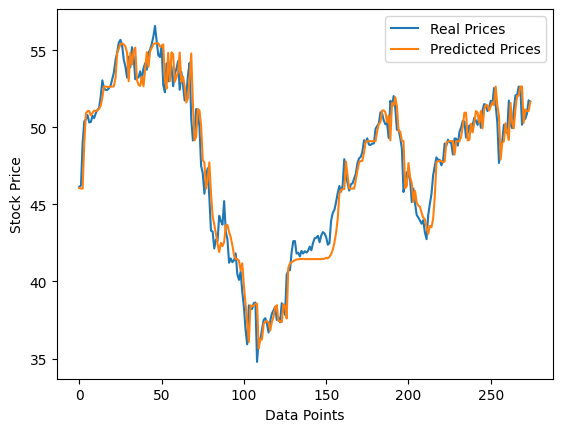

In [21]:
# Create the x-axis range
x = range(len(real_prices))

# Plot the real and predicted values
plt.plot(x, real_prices, label='Real Prices')
plt.plot(x, predicted_prices, label='Predicted Prices')

# Add labels and legend
plt.xlabel('Data Points')
plt.ylabel('Stock Price')
plt.legend()

# Display the graph
plt.show()